# Tensors

テンソルは配列や行列に非常によく似た特殊なデータ構造です。
PyTorchでは、モデルの入力と出力、およびモデルのパラメータをエンコードするためにテンソルを使用します。

テンソルは[NumPy](https://numpy.org/)のndarraysに似ていますが、テンソルはGPUや他のハードウェアアクセラレータ上で動作することができる点が異なります。実際、テンソルとNumPyの配列はしばしば同じメモリを共有することができ、データをコピーする必要がありません（`bridge-to-np-label`を参照）。
テンソルはまた、自動微分のために最適化されています（これについては後ほどAutogradのセクションで詳しく説明します）。

In [2]:
import torch
import numpy as np

## Tensorの初期化


テンソルは様々な方法で初期化することができる。以下の例を見てみよう。

**データから直接作成する**

テンソルはデータから直接作成することができる。データ型は自動的に推論される。



In [3]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

**NumPy array から生成**

テンソルはNumPyの配列から作成することができます（逆も同様です - `bridge-to-np-label` を参照してください）。


In [4]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

**another tensorから生成**

新しいテンソルは、明示的に上書きされない限り、引数のテンソルの特性(形状、データ型)を保持する。



In [16]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.5684, 0.3889],
        [0.2315, 0.3813]]) 



**ランダムまたは定数値:**

``shape`` はテンソルの次元を表すタプルである。以下の関数では、これは出力されるテンソルの次元を決定する。



In [7]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.8371, 0.0164, 0.8186],
        [0.6017, 0.4221, 0.9180]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


## テンソルの属性

テンソルの属性は、その形状、データ型、保存されるデバイスを記述する。

In [8]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## テンソルの演算

算術、線形代数、行列操作（転置、インデックス、スライス）、サンプリングなど、100以上のテンソル演算が可能。
インデックス付け、スライス）、サンプリングなど、100以上のテンソル演算が
包括的に記述されている[こちら](https://pytorch.org/docs/stable/torch.html)。

これらの各操作はGPU上で実行することができます（通常、CPU上よりも高速に）。
これらの操作はそれぞれGPUで実行できます(一般にCPUより高速)。Colabを使っている場合、Runtime > Change runtime type > GPUでGPUを割り当てます。

デフォルトでは、テンソルは CPU 上で作成されます。このため、テンソルを明示的にGPUに移動させる必要がある。
``.to`` メソッドを用いて明示的に GPU に移動する必要があります。大きなテンソルをデバイス間でコピーすることはデバイス間で大きなテンソルをコピーすると、時間とメモリの面で高くつくことに留意してください!


In [9]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

リストの中からいくつかの操作を試してみてください。
NumPy APIに慣れている人なら、Tensor APIは簡単に使えます。

**Standard numpy-like indexing and slicing:**



In [ ]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

**Joining tensors**

``torch.cat`` を使うと、一連のテンソルを与えられた次元に沿って連結することができます。
[torch.stack](https://pytorch.org/docs/stable/generated/torch.stack.html)も参照してください。
また、``torch.cat`` とは微妙に異なるテンソル結合オペもあります。


In [10]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[0.4884, 0.1629, 0.9538, 0.1861, 0.4884, 0.1629, 0.9538, 0.1861, 0.4884,
         0.1629, 0.9538, 0.1861],
        [0.0471, 0.8741, 0.9031, 0.0081, 0.0471, 0.8741, 0.9031, 0.0081, 0.0471,
         0.8741, 0.9031, 0.0081],
        [0.7120, 0.4729, 0.4292, 0.8756, 0.7120, 0.4729, 0.4292, 0.8756, 0.7120,
         0.4729, 0.4292, 0.8756]])


**Arithmetic operations**



In [11]:
# 2つのテンソル間の行列の掛け算を計算する。y1, y2, y3 は同じ値になる。
# ``tensor.T`` はテンソルの転置を返す。
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# これは要素ごとの積を計算します。z1, z2, z3 は同じ値になる。z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[2.3856e-01, 2.6530e-02, 9.0974e-01, 3.4650e-02],
        [2.2164e-03, 7.6412e-01, 8.1562e-01, 6.4827e-05],
        [5.0692e-01, 2.2368e-01, 1.8423e-01, 7.6660e-01]])

**単元テンソル**
単元テンソルがある場合、例えば全ての値を1つに集約することで
テンソルのすべての値を 1 つの値に集約することで、1 要素のテンソルを得た場合、それを Python の数値に変換することができます。



In [18]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

66.11334991455078 <class 'float'>


**インプレース演算**

結果をオペランドに格納する演算をインプレース演算と呼びます。これらは接尾辞 ``_`` で表現されます。
例えば、 ``x.copy_(y)`` や ``x.t_()`` は ``x`` を変更することになります。

In [14]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[0.4884, 0.1629, 0.9538, 0.1861],
        [0.0471, 0.8741, 0.9031, 0.0081],
        [0.7120, 0.4729, 0.4292, 0.8756]]) 

tensor([[5.4884, 5.1629, 5.9538, 5.1861],
        [5.0471, 5.8741, 5.9031, 5.0081],
        [5.7120, 5.4729, 5.4292, 5.8756]])


インプレース演算はメモリを節約できますが、微分計算をするときに履歴がすぐに失われるため、問題が生じる可能性があります。
そのため、使用はお勧めしません。



## NumPyとのブリッジ
CPU上のテンソルとNumPyのアレイは、メモリを共有することができます。
一方を変更するともう一方も変更されます。

### Tensor to NumPy array



In [15]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


テンソルの変化は、NumPyの配列に反映される。

In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

### NumPy array to Tensor



In [ ]:
n = np.ones(5)
t = torch.from_numpy(n)

NumPy配列の変更はテンソルに反映される。



In [31]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


--------------




# Datasets & DataLoaders


データサンプルを処理するコードは煩雑になりやすく、メンテナンスも大変です。
読みやすさとモジュール化のために、モデル学習コードから切り離されることが理想です。
PyTorchは2つのデータプリミティブを提供しています。PyTorch には ``torch.utils.data.DataLoader`` と ``torch.utils.data.Dataset`` という2つのデータプリミティブがあり、あらかじめロードされたデータセットを利用することができます。
の2つのデータプリミティブがあり、あらかじめロードされたデータセットや独自のデータを使用することができる。
Dataset`` にはサンプルとそれに対応するラベルが格納され、 ``DataLoader`` はイテラブルにラップしている。
データローダーは、サンプルに簡単にアクセスできるように ``Dataset`` を反復処理できるようにラップします。

PyTorchのドメインライブラリには、あらかじめロードされたデータセット（FashionMNISTなど）が用意されています。
をサブクラスとし、特定のデータに特化した関数を実装しています。
これらはあなたのモデルのプロトタイプやベンチマークに使用することができます。これらのデータは
ここで見つけることができます。[Image Datasets](https://pytorch.org/vision/stable/datasets.html),
[テキストデータセット](https://pytorch.org/text/stable/datasets.html)、そして
[オーディオデータセット](https://pytorch.org/audio/stable/datasets.html)


## データセットの読み込み

以下は、TorchVisionの[Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/)データセットを読み込む例です。
Fashion-MNISTは、Zalandoの記事画像のデータセットで、60,000の学習例と10,000のテスト例から構成されています。
各例は、28×28のグレースケール画像と、10クラスのうちの1つのラベルから構成される。

[FashionMNIST Dataset](https://pytorch.org/vision/stable/datasets.html#fashion-mnist)を以下のパラメータでロードする。
 - ``root`` は学習/テストデータが格納されているパスである。
 - ``root`` はトレーニング/テストデータが格納されているパス、 ``train`` はトレーニングデータセットまたはテストデータセットを指定します。
 - ルートディレクトリにデータがない場合は ``download=True`` が指定され、インターネットからデータをダウンロードする。
 - ``transform`` と ``target_transform`` は、特徴量とラベルの変換を指定する。

In [19]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## データセットの反復処理と可視化

データセット ``Datasets`` をリストのように手動でインデックス化することができます．training_data[index]`` です。
ここでは、 ``matplotlib`` を使用して、トレーニングデータのサンプルを可視化します。


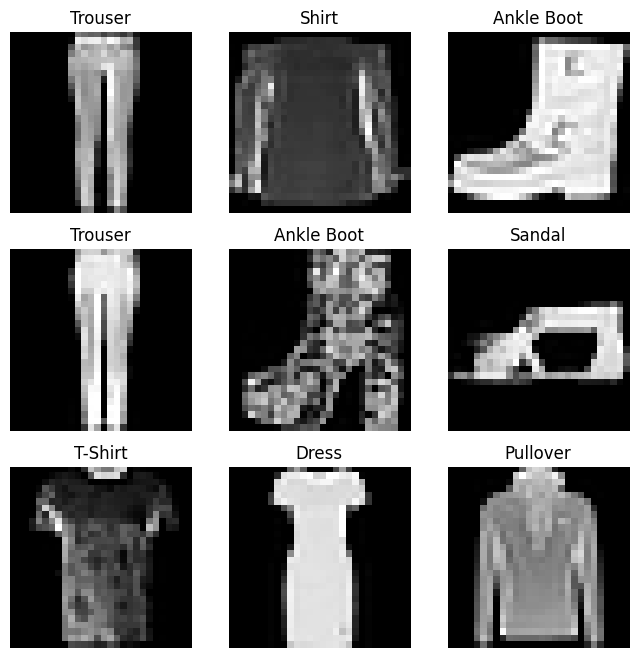

In [20]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

..
 .. figure:: /_static/img/basics/fashion_mnist.png
   :alt: fashion_mnist



--------------




## 独自のファイルのためのカスタムデータセットを作成する

カスタム Dataset クラスは、3 つの関数を実装する必要があります。init__`、`__len__`、`__getitem__` の3つの関数を実装する必要があります。
この実装を見てみましょう。
はディレクトリ ``img_dir`` に、ラベルは CSV ファイル ``annotations_file`` にそれぞれ保存されています。

次のセクションでは、それぞれの関数で何が起こっているのかを分解して説明します。


In [21]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

### __init__

__init__ 関数は、Dataset オブジェクトのインスタンスを作成する際に一度だけ実行されます。初期化するのは
を含むディレクトリ，アノテーションファイル，および両変換（次のセクションで詳しく説明します）を初期化します．
を含むディレクトリを初期化します。）

labels.csvファイルは次のようになります：::

    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9



In [22]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

### __len__

__len__ 関数は、データセットのサンプル数を返します。


In [23]:
def __len__(self):
    return len(self.img_labels)

### __getitem__

__getitem__ 関数は、データセットから指定されたインデックス ``idx`` にあるサンプルをロードして返します。
このインデックスをもとに、ディスク上の画像の位置を特定し、 ``read_image`` を用いてテンソルへの変換を行い、 ``self.img_labels`` の csv データから対応するラベルを取得します。
``self.img_labels`` の csv データから対応するラベルを取得し、(必要に応じて) 変換関数を呼び出して、テンソル画像とそれに対応するラベルを
を呼び出し、テンソル画像と対応するラベルをタプルで返す。



In [24]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

--------------




## DataLoaders を使って学習用のデータを準備する
``Dataset`` は、データセットの特徴量とラベルを一度に取得する。モデルの学習では、通常
モデルのオーバーフィッティングを減らすために、エポック毎にデータをシャッフルします。また、Pythonの ``multiprocessing`` を使用して、データの取得を高速化します。
Python の ``multiprocessing`` を使用してデータ検索を高速化する。

``DataLoader`` はイテラブルで、このような複雑な処理を簡単な API で抽象化したものである。


In [25]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## DataLoader を繰り返し処理する

データセットを ``DataLoader`` にロードしたので、必要に応じてデータセットを繰り返し処理することができます。
以下の各反復処理では、 ``train_features`` と ``train_labels`` (それぞれ ``batch_size=64`` の特徴とラベルを含む) のバッチが返されます。
``shuffle=True`` を指定したため、すべてのバッチを繰り返し処理した後に、データがシャッフルされます（データのロード順序をより細かく制御する場合は
より細かいデータロード順序の制御については、[Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler) を参照してください)。

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


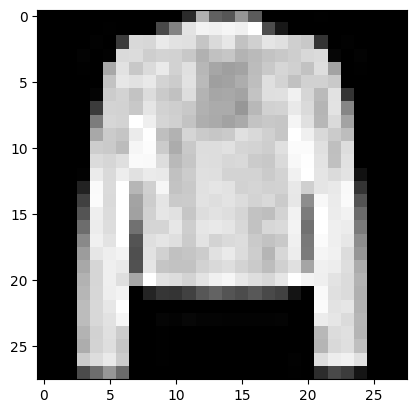

Label: 4


In [28]:
# Display image and label.
# 繰り返し実行
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Transforms
機械学習アルゴリズムの学習に必要なデータは、必ずしも最終的に加工された形で提供されるわけではありません。
機械学習アルゴリズムの学習に必要な最終的な加工が施された状態で提供されるとは限りません。私たちは、**変換**を使用して、データに何らかの操作を加え
を使用して、データに何らかの加工を施し、学習に適した状態にします。

すべてのTorchVisionデータセットには2つのパラメータがあります -``transform`` で特徴量を変更し
ラベルを変更するための ``target_transform`` という2つのパラメータがあり、変換ロジックを含むcallableを受け取ります。
[torchvision.transforms](https://pytorch.org/vision/stable/transforms.html)モジュールは、以下のような変換ロジックを提供します。
モジュールは、よく使われるいくつかの変換をそのまま提供します。

FashionMNISTの特徴はPIL Imageフォーマットで、ラベルは整数値です。
学習には、特徴量を正規化したテンソル、ラベルを一光子符号化したテンソルが必要です。
これらの変換を行うために、 ``ToTensor`` と ``Lambda`` を使用します。



In [29]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

## ToTensor()

[ToTensor](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor)
PIL 画像または NumPy の ``ndarray`` を ``FloatTensor`` に変換し、画像のピクセル強度の値を [0., 1.] の範囲でスケーリングします．



## Lambda Transforms

ラムダ変換は、ユーザーが定義した任意のラムダ関数を適用する。ここでは、整数を一発符号化されたテンソルに変換する関数
を定義し、整数をワンホットエンコードされたテンソルに変換する。
まず、サイズ10（データセットのラベル数）のゼロテンソルを生成し[scatter_](https://pytorch.org/docs/stable/generated/torch.Tensor.scatter_.html)を呼び出す。
ラベル ``y`` で与えられるインデックスに ``value=1`` を代入する。


In [30]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

--------------




# ニューラルネットワークの構築

ニューラルネットワークはデータに対して演算を行う層/モジュールで構成されています。
[torch.nn](https://pytorch.org/docs/stable/nn.html)の名前空間は、あなたが独自のニューラルネットワークを構築するために必要なすべてのビルディングブロックを提供します。
名前空間は、あなた自身のニューラルネットワークを構築するために必要なすべてのビルディングブロックを提供します。PyTorchのすべてのモジュールは[nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html)をサブクラスとしています。
ニューラルネットワークは、他のモジュール(層)から構成されるモジュールそのものです。この入れ子構造により、複雑なアーキテクチャの構築と管理が容易になります。

以下の章では、FashionMNISTデータセットの画像を分類するためのニューラルネットワークを構築します。

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## 学習用デバイスの取得
GPUのようなハードウェアアクセラレータでモデルを学習できるようにしたい。
が利用可能であれば 以下のようにチェックします。
[torch.cuda](https://pytorch.org/docs/stable/notes/cuda.html)が利用可能かどうか確認してみましょう。
CPUを使い続けます。


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


## クラスを定義する
ニューラルネットワークを ``nn.Module`` のサブクラスとして定義し、 ``__init__`` でニューラルネットワークのレイヤーを初期化します。
ニューラルネットワークのレイヤーを ``__init__`` で初期化します。各 ``nn.Module`` のサブクラスは、 ``forward`` で入力データに対する操作を実装しています。

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

``NeuralNetwork`` のインスタンスを生成して ``device`` に移動し、その構造を表示します。

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


モデルを使用するには、入力データを渡します。これにより、モデルの ``forward`` といくつかの [バックグラウンド処理](https://github.com/pytorch/pytorch/blob/270111b7b611d174967ed204776985cefca9c144/torch/nn/modules/module.py#L866) が実行されます。
直接 ``model.forward()`` を呼び出さないでください!

入力に対してモデルを呼び出すと、各クラスの10個の生の予測値の各出力に対応する dim=0 と、各出力の個々の値に対応する dim=1 の2次元のテンソルが返されます。
これを ``nn.Softmax`` モジュールのインスタンスに渡すことで、予測確率を得ることができます。

In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([3])


--------------




## モデルのレイヤー

FashionMNISTモデルのレイヤーを分解してみましょう。これを説明するために
サイズ28x28の3つの画像からなるミニバッチのサンプルを取り、それをネットワークに通すとどうなるかを見る。

In [ ]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


### nn.Flatten
[nn.Flatten](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html)を初期化する。
レイヤーを初期化し，各2次元28x28画像を784ピクセル値の連続した配列に変換します (
ミニバッチの次元(dim=0)は維持されます)に変換します。



In [ ]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


### nn.Linear
[線形層](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
は、保存された重みとバイアスを使用して入力に線形変換を適用するモジュールです。


In [ ]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


### nn.ReLU
非線形アクティベーションは、モデルの入力と出力の間の複雑なマッピングを作成するものです。
線形変換の後に適用することで、非線形性を導入し、ニューラルネットワークが様々な現象を学習できるようにします。
様々な現象を学習させることができます。

このモデルでは、線形層の間に[nn.ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)を使用しています。
しかし、あなたのモデルに非直線性を導入するために他の活性化があります。

In [ ]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.0061,  0.3501, -0.2831, -0.0748, -0.5628, -0.3663,  0.5070, -0.0542,
          0.0074, -0.3425,  0.2388,  0.5941, -0.0052, -0.2502,  0.1010, -0.1993,
         -0.5807,  0.0267,  0.3028, -0.2059],
        [ 0.1252,  0.2977, -0.2495, -0.3253, -0.0790, -0.4491,  0.4364, -0.4828,
         -0.0539, -0.4670,  0.3034,  0.5885, -0.0623, -0.3835,  0.1391, -0.2973,
         -0.8129,  0.3551,  0.4593, -0.5179],
        [ 0.2823,  0.1273, -0.3789,  0.0602, -0.0666, -0.7040,  0.0302, -0.5546,
          0.1214, -0.2027,  0.2214,  0.5720, -0.2314, -0.3769, -0.0344,  0.1990,
         -0.9422,  0.2650,  0.2597, -0.3966]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0061, 0.3501, 0.0000, 0.0000, 0.0000, 0.0000, 0.5070, 0.0000, 0.0074,
         0.0000, 0.2388, 0.5941, 0.0000, 0.0000, 0.1010, 0.0000, 0.0000, 0.0267,
         0.3028, 0.0000],
        [0.1252, 0.2977, 0.0000, 0.0000, 0.0000, 0.0000, 0.4364, 0.0000, 0.0000,
         0.0000, 0.3034, 0.5885, 0.0000, 0.0000, 0.13

### nn.Sequential
[nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)は、順番に並べられた
モジュールのコンテナです。データは、定義されたとおりの順序ですべてのモジュールに渡されます。を使うことができます。
シーケンシャルコンテナを使って、 ``seq_modules`` のように素早くネットワークを構築することができます。



In [ ]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

### nn.Softmax
ニューラルネットワークの最後の線形層は `logits` - [-\infty, \infty] の実数- を返し、[nn.Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) モジュールに渡されます。logitsはモデルを表す[0, 1]の値にスケーリングされる。
[0, 1]の値にスケーリングされ、各クラスに対するモデルの予測確率を表します。パラメータ ``dim`` は次元を表します。
パラメータは，値の合計が1になる次元を表します．



In [ ]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

## Model Parameters
ニューラルネットワークの多くの層はパラメータ化されており、学習時に最適化された重みとバイアスがあります。
とバイアスがあり、学習中に最適化されます。``nn.Module`` のサブクラスは自動的に
をサブクラス化すると、モデルオブジェクト内で定義されたすべてのフィールドを追跡し、すべてのパラメータにアクセスできるようになります。
また、モデルの ``parameters()`` や ``named_parameters()`` メソッドを用いて、すべてのパラメータにアクセスできるようになります。

この例では、各パラメータを繰り返し処理し、そのサイズと値のプレビューを表示します。




In [ ]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0171, -0.0329, -0.0112,  ..., -0.0309,  0.0098, -0.0147],
        [-0.0060,  0.0020,  0.0290,  ...,  0.0055,  0.0288, -0.0051]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0354, 0.0317], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0202, -0.0007, -0.0076,  ...,  0.0421,  0.0263,  0.0313],
        [-0.0230,  0.0301, -0.0362,  ..., -0.0008, -0.0017, -0.0152]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Si

--------------




# Automatic Differentiation with ``torch.autograd``

ニューラルネットワークを学習させる場合、最もよく使われるアルゴリズムが**逆伝播法**である。このアルゴリズムでは、パラメータ（モデルの重み）が損失関数の**勾配**にしたがって調整される。

この勾配を計算するために、PyTorchは ``torch.authime`` という微分エンジンを内蔵しています。
と呼ばれる微分エンジンを内蔵しています。これは、任意の計算グラフに対して勾配の自動計算をサポートします。
計算グラフの勾配の自動計算をサポートします。

例えば、最も単純な1層のニューラルネットワークを考えてみましょう。
パラメータ ``w`` と ``b`` 、そして何らかの損失関数を持つ、最も単純な 1 層のニューラルネットワークを考えてみましょう。これは
PyTorch では次のように定義できる。

In [39]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

## Tensors, Functions and Computational graph

このコードは、次のような**計算グラフ**を定義しています。

![図](https://pytorch.org/tutorials/_images/comp-graph.png)

このネットワークでは、``w`` と ``b`` が **パラメータ** であり、これを最適化する必要があります。
最適化する必要があります。したがって、これらの変数に関する損失関数の勾配を計算できる必要があります。
関数の勾配を計算できるようにする必要があります。これを実現するために
を設定する。


``requires_grad`` の値は、テンソルを作成するときに設定するか、後で ``x.requires_grad_(True)`` メソッドを使用して設定することができる。

テンソルに適用して計算グラフを構築する関数は、実際には ``Function`` クラスのオブジェクトである。このオブジェクトは、*forward* 方向の関数の計算方法と、*backward propagation* ステップでのその微分の計算方法を持っています。後方伝搬関数への参照は、テンソルの ``grad_fn`` プロパティに格納される。関数 ``Function`` の詳細については、[ドキュメント](https://pytorch.org/docs/stable/autograd.html#function)を参照してください。


In [40]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x17ed279d0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x17ed27e80>


## Computing Gradients

ニューラルネットワークのパラメータの重みを最適化するためには、損失関数のパラメータに関する導関数を計算する必要があります。つまり、固定値 ``x``と``y``の下で、$\frac{\partial loss}{\partial w}$ と $\frac{\partial loss}{\partial b}$ が必要です。
これらの導関数を計算するために、 ``loss.backward()`` を呼び出し、 ``w.grad`` と ``b.grad`` から値を取得します。



In [41]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.2489, 0.3117, 0.3249],
        [0.2489, 0.3117, 0.3249],
        [0.2489, 0.3117, 0.3249],
        [0.2489, 0.3117, 0.3249],
        [0.2489, 0.3117, 0.3249]])
tensor([0.2489, 0.3117, 0.3249])


## Disabling Gradient Tracking

デフォルトでは、 ``requires_grad=True`` のテンソルはすべて計算履歴を追跡し、勾配計算をサポートする。
しかし、その必要がない場合もある。例えば、モデルを学習させ、それを入力データに適用したい場合、つまり、ネットワークを通して*フォワード*計算を行いたいだけという場合である。計算コードを ``torch.no_grad()`` ブロックで囲むことで、トラッキング計算を停止させることができます。




In [ ]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


同じ結果を得るためのもう一つの方法は、テンソルに対して ``detach()`` メソッドを使用することです。




In [ ]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


グラディエント・トラッキングを無効にしたい理由があります。
  - ニューラルネットワークのいくつかのパラメータを**frozen parameters**としてマークするため。これは
    これは非常に一般的なシナリオです。
    [finetuning a pretrained network](https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html)
  - 勾配を追跡しないテンソルの計算の方がより高速になるため、フォワードパスだけを行う場合の計算を**高速化する。
    勾配を追跡しないテンソルの計算がより効率的であるため。


## More on Computational Graphs
概念的には、autogradはデータ(テンソル)と実行されたすべての操作(結果の新しいテンソルも含む)の記録を
[Function](https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function) オブジェクトからなる有向非循環グラフ (DAG) に記録する。この DAG において、葉は入力テンソル、根は出力テンソ ルである。このグラフを根から葉までたどれば、鎖の法則を使って自動的に勾配を計算することができる。

フォワードパスにおいて、autogradは同時に2つのことを行う。

- 要求された演算を実行し、結果のテンソルを計算する
- DAGの中で操作の*勾配関数*を維持する。

バックワードパスは ``.backward()`` がDAGルートで呼ばれたときにキックオフされます。その後、 ``autograd`` が呼び出される。

- 各 ``.grad_fn`` から勾配を計算する。
- 各テンソルの ``.grad`` 属性に蓄積する。


## Optional Reading: テンソル勾配とヤコビアン積

多くの場合，スカラー損失関数があり，あるパラメータに対する勾配 を計算する必要があります．しかし は、出力関数が任意のテンソルである場合です。このような場合、PyTorch では、実際の勾配ではなく、いわゆる **ヤコビアン積** を計算することができます。を計算することができます。

$\vec{x}=\langle x_1,\dots,x_n\rangle$ と $\vec{y}=\langle y_1,\dots,y_m\rangle$とする、ベクトル関数 $\vec{y}=f(\vec{x})$ の $\vec{x}$ に対する $\vec{y}$ の勾配は **Jacobian行列**で与えられる。

\begin{align}J=\left(\begin{array}{ccc}
      \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
      \vdots & \ddots & \vdots\\
      \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
      \end{array}\right)\end{align}


PyTorchでは、ヤコビアン行列そのものを計算する代わりに、与えられた入力ベクトル $v=(v_1 \dots v_m)$ に対する **Jacobian Product** $v^T\cdot J$ を計算することが可能です。これは、$v$を引数として ``backward`` を呼び出すことで実現されます。 $v$ のサイズは、積を計算したい元のテンソルのサイズと同じでなければなりません。


In [ ]:
inp = torch.eye(4, 5, requires_grad=True)
out = (inp+1).pow(2).t()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"First call\n{inp.grad}")
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nSecond call\n{inp.grad}")
inp.grad.zero_()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nCall after zeroing gradients\n{inp.grad}")

First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])

Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])


同じ引数で2回目の ``backward`` を呼び出したとき、勾配の値が異なることに注意してください。これは、 ``backward`` 伝搬を行う際に、PyTorch が **勾配を累積する** ためで、つまり、計算された勾配の値は、計算グラフのすべてのリーフノードの ``grad`` プロパティに追加されることになります。つまり、計算された勾配の値は、計算グラフのすべてのリーフノードの ``grad`` プロパティに追加されます。適切な勾配を計算したい場合は、事前に ``grad`` プロパティをゼロにする必要があります。実際のトレーニングでは、*最適化ツール* がこれを手助けしてくれます。


以前は ``backward()`` 関数をパラメータなしで呼び出していました。これは本質的には ``backward(torch.tensor(1.0))`` を呼び出すことと同じで、ニューラルネットワークの学習における損失のようなスカラー値を持つ関数の場合に勾配を計算するのに便利な方法です。




--------------




# Optimizing Model Parameters

モデルとデータが揃ったので、次はデータに対してモデルのパラメータを最適化することで、モデルを訓練、検証、テストする番です。モデルの学習は反復プロセスです。各反復において、モデルは出力について推測し、その推測の誤差（*損失*）を計算し、その誤差のパラメータに対する導関数を収集し（前のセクションで見たように）、勾配降下を使用してこれらのパラメータを**最適化**します。

## 前提となるコード
データセットとデータローダー、モデルの構築で使ったコードを再利用します。


In [42]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

## Hyperparameters

ハイパーパラメーターは、モデルの最適化プロセスを制御するための調整可能なパラメーターです。ハイパーパラメータの値が異なると、モデルの学習や収束率に影響を与えます（ハイパーパラメータのチューニングについては[続きを読む](https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html)をご覧ください）。

ここでは、学習用のハイパーパラメータを以下のように定義しています。
 - **エポック数** - データセットに対して反復処理を行う回数
 - **バッチサイズ** - パラメータが更新される前にネットワークに伝搬されるデータサンプルの個数
 - **学習速度** - 各バッチ/エポックにおいて、モデルのパラメータをどれだけ更新するか。小さい値を設定すると学習速度が遅くなり、大きい値を設定すると学習時に予測不可能な挙動をする可能性がある。




In [43]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

## Optimization Loop

ハイパーパラメータを設定したら、ループ処理でモデルを学習し最適化することができます。ループ処理の各反復は、**エポック**と呼ばれます。

各エポックは主に2つの部分から構成されています。
 - **訓練ループ** - 訓練データセットを繰り返し、最適なパラメータに収束させようとする。
 - **検証/テストループ** - テストデータセットを繰り返し処理し、モデルの性能が向上しているかどうかを確認します。

トレーニングループで使われるいくつかの概念について簡単に説明します。

### 損失関数

学習データを提示されたとき、学習していないネットワークは正しい答えを出さない可能性が高いです。**損失関数**は、得られた結果の目標値に対する非類似度を測定するもので、学習中に最小化したい損失関数です。損失を計算するために、与えられたデータサンプルの入力を使って予測を行い、真のデータラベルの値と比較します。

一般的な損失関数は回帰タスクの[nn.MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) (Mean Square Error)、分類の[nn.NLLLoss](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss) (Negative Log Likelihood)などです。
[nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) は ``nn.LogSoftmax`` と ``nn.NLLoss`` を結合したものです。

モデルの出力ロジットを ``nn.CrossEntropyLoss`` に渡すと、ロジットが正規化されて予測誤差が計算されます。

In [44]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

### Optimizer

最適化とは、各トレーニングステップにおいて、モデルの誤差を減らすためにモデルのパラメータを調整するプロセスです。**最適化アルゴリズム** は、このプロセスの実行方法を定義します（この例では、Stochastic Gradient Descent を使用します）。
すべての最適化ロジックは ``optimizer`` オブジェクトにカプセル化されています。ここでは、SGDオプティマイザを使用しています。さらに、PyTorchにはADAMやRMSPropなど多くの[異なるオプティマイザ](https://pytorch.org/docs/stable/optim.html)があります。

学習が必要なモデルのパラメータを登録し、学習率ハイパーパラメータを渡すことでオプティマイザを初期化します。


In [45]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

学習ループの内部では、3つのステップで最適化が行われます。
 * モデルパラメータの勾配をリセットするために ``optimizer.zero_grad()`` をコールします。勾配はデフォルトで加算されます。二重計算を防ぐために、各反復で明示的にゼロにします。
 * 予測損失は ``loss.backward()`` のコールでバックプロパゲートされます。PyTorchは、各パラメータに対する損失の勾配を記録します。
 * 勾配が得られたら、 ``optimizer.step()`` を呼び出して、バックワードパスで収集した勾配を元にパラメータを調整します。



## Full Implementation
最適化コードをループする ``train_loop`` と、テストデータに対してモデルの性能を評価する ``test_loop`` を定義する。
テストデータに対してモデルの性能を評価する ``test_loop`` を定義する。



In [46]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

損失関数とオプティマイザを初期化し、 ``train_loop`` と ``test_loop`` に渡します。
エポック数を増やして、モデルの性能が向上していることを自由に確認することができます。

In [47]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.306156  [    0/60000]
loss: 2.292078  [ 6400/60000]
loss: 2.267754  [12800/60000]
loss: 2.263288  [19200/60000]
loss: 2.249501  [25600/60000]
loss: 2.219507  [32000/60000]
loss: 2.227329  [38400/60000]
loss: 2.200620  [44800/60000]
loss: 2.196187  [51200/60000]
loss: 2.156735  [57600/60000]
Test Error: 
 Accuracy: 45.6%, Avg loss: 2.158037 

Epoch 2
-------------------------------
loss: 2.176250  [    0/60000]
loss: 2.165834  [ 6400/60000]
loss: 2.103708  [12800/60000]
loss: 2.116235  [19200/60000]
loss: 2.072739  [25600/60000]
loss: 2.015505  [32000/60000]
loss: 2.035472  [38400/60000]
loss: 1.967360  [44800/60000]
loss: 1.971847  [51200/60000]
loss: 1.887933  [57600/60000]
Test Error: 
 Accuracy: 59.6%, Avg loss: 1.894769 

Epoch 3
-------------------------------
loss: 1.936851  [    0/60000]
loss: 1.907815  [ 6400/60000]
loss: 1.786523  [12800/60000]
loss: 1.819150  [19200/60000]
loss: 1.716983  [25600/60000]
loss: 1.668361  [32000/600

## Loss Functions
- [Loss Functions](https://pytorch.org/docs/stable/nn.html#loss-functions)

### MSELOSS
入力$x$とターゲット$y$の各要素間の平均二乗誤差（L2ノルムの二乗）を測定する基準を作成します。

次元を維持する（reduction='none'）場合は、以下のように記述することができます。ここで $N$ はバッチサイズです。

$\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad l_n = \left( x_n - y_n \right)^2$ 

reductionを'none' ではない場合(デフォルトは'mean')は以下のように記述できます。

$\ell(x, y) = \begin{cases} \operatorname{mean}(L), & \text{if reduction} = \text{`mean';}\\ \operatorname{sum}(L), & \text{if reduction} = \text{`sum'.} \end{cases}$
 
$x$と$y$はそれぞれ合計$n$個の要素を持つ任意の形のテンソルです。

平均演算はやはり全要素に対して行われ、$n$で除算されます。

reduction = 'sum' とすれば，$n$による除算を避けることができます。


### NLLLoss
負の対数尤度損失（Negative Log Likelihood Loss）。C個のクラスからなる分類問題を学習するのに有用です。

オプションの引数 weight は、各クラスに重みを割り当てる 1次元テンソルでなければなりません。これは，アンバランスな学習セットを持っている場合に特に有用です。

inputは、( $minibatch, C$ )または( $minibatch, C, d_1, d_2, ..., d_K$ )のいずれかのサイズのTensorでなければならず、K次元の場合は $K \geq 1$ でなければならない。後者は、2次元画像の画素あたりのNLLLOSSを計算するような高次元の入力に有効である。

ニューラルネットワークで対数確率を得るには、ネットワークの最後の層にLogSoftmax層を追加することで簡単に実現できます。余分なレイヤーを追加したくない場合は、代わりにCrossEntropyLossを使用することができます。

この損失が期待するターゲットは、$[0, C-1]$ (C = クラス数) の範囲にあるクラスインデックスでなければなりません。

また、ignore_indexが指定された場合、この損失はこのクラスインデックスを受け付けます (このインデックスは必ずしもクラスの範囲内でなくても構いません)。

$x$がinput, $y$がtarget, $w$がweight, $N$はバッチサイズ.

$\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad l_n = - w_{y_n} x_{n,y_n}, \quad w_{c} = \text{weight}[c] \cdot \mathbb{1}\{c \not= \text{ignore\_index}\}$,

reductionを'none' ではない場合(デフォルトは'mean')は以下のように記述できます。

$\ell(x, y) = \begin{cases} \sum_{n=1}^N \frac{1}{\sum_{n=1}^N w_{y_n}} l_n, & \text{if reduction} = \text{`mean';}\\ \sum_{n=1}^N l_n, & \text{if reduction} = \text{`sum'.} \end{cases}$

### CrossEntropyLoss

入力ロジットとターゲット間のクロスエントロピーの損失を計算する。

これは、C個のクラスを持つ分類問題を学習するときに有用である。オプションの引数weightは、各クラスに重みを割り当てる1次元テンソルでなければなりません。これは，アンバランスな学習セットを持っている場合に特に有用である．

入力は、各クラスの非正規化ロジット（一般に、正であったり、和が1になる必要はない）を含むことが期待される。 inputは、バッチされていないinputではサイズ ($C$)、K次元の場合には$Kを1$とした ($minibatch, C$) または ($minibatch, C, d_1, d_2, ..., d_K$) のTensorでなければならない。最後に、2次元画像のピクセル毎のクロスエントロピー損失を計算するような高次元の入力に有用である。

この基準が期待するtargetは、以下のいずれかを含むべきである。

- $[0, C)$ ($C$ はクラス数); ignore_index が指定された場合、この損失はこのクラスインデックスも受け入れます（このインデックスは必ずしもクラス範囲内にあるとは限りません）。この場合の未削減(つまり削減を'なし'に設定した場合)の損失は次のように記述できる。

    ここで$x$は入力、$y$はターゲット、$w$は重み、$C$はクラス数、$N$はミニバッチ次元と$K$次元の場合の$d_1, ..., d_kd$にまたがるものである。
    
    $\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad l_n = - w_{y_n} \log \frac{\exp(x_{n,y_n})}{\sum_{c=1}^C \exp(x_{n,c})} \cdot \mathbb{1}\{y_n \not= \text{ignore\_index}\}$

    reductionが'none'でない場合(デフォルトは'mean')は以下のように記述できる。

    $\ell(x, y) = \begin{cases} \sum_{n=1}^N \frac{1}{\sum_{n=1}^N w_{y_n} \cdot \mathbb{1}\{y_n \not= \text{ignore\_index}\}} l_n, & \text{if reduction} = \text{`mean';}\\ \sum_{n=1}^N l_n, & \text{if reduction} = \text{`sum'.} \end{cases}$
 
    この場合、LogSoftmaxとNLLLossの組み合わせと同等であることに注意してください。

- 各クラスの確率；混合ラベル、ラベルスムージングなど、ミニバッチアイテムごとに単一クラス以上のラベルが必要な場合に有用。この場合の未削減（つまり、削減を「なし」に設定した場合）の損失は、次のように記述できる。

    ここで、$x$は入力、$y$はターゲット、$w$は重み、$C$はクラス数、$N$はミニバッチ次元とK次元の場合の$d_1, ..., d_kd$にまたがる。

    $\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad l_n = - \sum_{c=1}^C w_c \log \frac{\exp(x_{n,c})}{\sum_{i=1}^C \exp(x_{n,i})} y_{n,c}$​

    reductionが'none'でない場合(デフォルトは'mean')は以下のように記述できる。

    $\ell(x, y) = \begin{cases} \frac{\sum_{n=1}^N l_n}{N}, & \text{if reduction} = \text{`mean';}\\ \sum_{n=1}^N l_n, & \text{if reduction} = \text{`sum'.} \end{cases}$

# torchtext ライブラリを使ったテキスト分類

このチュートリアルでは、テキスト分類分析のためのデータセットを構築するために torchtext ライブラリを使用する方法を紹介します。ユーザは以下のような柔軟性を持つことができます。

   - イテレータとして生データにアクセスする
   - データ処理パイプラインを構築して、生のテキスト文字列を ``torch.Tensor`` に変換し、モデルの学習に使用する。
   - [torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader) を使ってデータをシャッフルし、反復処理する。


## 生のデータセットイテレータへのアクセス

torchtext ライブラリには、生のテキスト文字列を返す生のデータセットイテレータがいくつか用意されています。例えば、 ``AG_NEWS`` データセットイテレータは、ラベルとテキストのタプルとして生データを得ることができる。

torchtextのデータセットにアクセスするには、https://github.com/pytorch/data の説明に従ってtorchdataをインストールしてください。


In [1]:
import torch
from torchtext.datasets import AG_NEWS
train_iter = iter(AG_NEWS(split='train'))

In [2]:
next(train_iter)

(3,
 "Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.")

## データ処理パイプラインを用意する

ボキャブラリー、ワードベクター、トークナイザーなど、torchtextライブラリの非常に基本的な構成要素について再確認しました。これらは生のテキスト文字列に対する基本的なデータ処理のビルディングブロックです。

ここでは、トークナイザーとボキャブラリーを使った典型的な自然言語処理例を紹介します。まず、生の学習データセットから語彙を作る。ここでは、ビルトインの
ファクトリー関数 `build_vocab_from_iterator` を使う。この関数では、トークンのリストかイテレータを受け取る。また、語彙に追加する特殊なシンボルを渡すこともできる。
語彙に追加する特別な記号を渡すこともできる。



In [ ]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer('basic_english')
train_iter = AG_NEWS(split='train')

def yield_tokens(data_iter):
    for _, text in data_iter:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(train_iter), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

vocabularyブロックは，トークンのリストを整数に変換する。
::

    vocab(['here', 'is', 'an', 'example'])
    >>> [475, 21, 30, 5297]

トークナイザーとボキャブラリーでテキスト処理パイプラインを準備します。テキストパイプラインとラベルパイプラインは、データセットイテレータからの生データ文字列を処理するために使用されます。


In [ ]:
text_pipeline = lambda x: vocab(tokenizer(x))
label_pipeline = lambda x: int(x) - 1

テキストパイプラインは，語彙に定義されたルックアップテーブルに基づいて，文字列を整数のリストに変換する．ラベルパイプラインは、ラベルを整数に変換する。例えば

::

    text_pipeline('here is the an example')
    >>> [475, 21, 2, 30, 5297]
    label_pipeline('10')
    >>> 9




## データバッチとイテレータを生成する

データローダー（DataLoader）は ``getitem()`` と ``len()`` プロトコルを実装したマップ形式のデータセットで動作し、インデックス/キーからデータサンプルへのマップを表現します。また、引数として ``False`` を指定した、反復処理可能なデータセットでも動作します。

モデルに送信する前に、 ``collate_fn`` 関数は ``DataLoader`` から生成されたサンプルのバッチを処理する。``collate_fn`` への入力は ``DataLoader`` にあるバッチサイズのデータであり、 ``collate_fn`` は先に宣言したデータ処理パイプラインに従ってそれらを処理する。ここで注意してほしいのは、 ``collate_fn`` がトップレベルの def として宣言されていることだ。 これにより、この関数が各ワーカーで利用できるようになる。

この例では、元のデータバッチの入力に含まれるテキストエントリーをリストにパックし、一つのテンソルとして連結して ``nn.EmbeddingBag`` の入力とします。offsetはテキストテンソル中の個々のシーケンスの開始インデックスを表すデリミタのテンソルである。ラベルは個々のテキストエントリのラベルを保存したテンソルである。

In [ ]:
from torch.utils.data import DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def collate_batch(batch):
    label_list, text_list, offsets = [], [], [0]
    for (_label, _text) in batch:
         label_list.append(label_pipeline(_label))
         processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
         text_list.append(processed_text)
         offsets.append(processed_text.size(0))
    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text_list = torch.cat(text_list)
    return label_list.to(device), text_list.to(device), offsets.to(device)

train_iter = AG_NEWS(split='train')
dataloader = DataLoader(train_iter, batch_size=8, shuffle=False, collate_fn=collate_batch)

## モデルの定義

モデルは [nn.EmbeddingBag](https://pytorch.org/docs/stable/nn.html?highlight=embeddingbag#torch.nn.EmbeddingBag)レイヤーと、分類を目的とした線形レイヤーから構成されます。``nn.EmbeddingBag``はデフォルトのモードが "mean "で、埋め込みの "bag "の平均値を計算する。ここでは、テキストのエントリは異なる長さを持っていますが、テキストの長さはオフセットで保存されているので、nn.EmbeddingBagモジュールはここでパディングを必要としません。

さらに、``nn.EmbeddingBag`` は埋め込み全体の平均をその場で蓄積するので、パディングは必要ありません。
さらに、``nn.EmbeddingBag`` は、埋め込み全体の平均をオンザフライで蓄積するため、一連の処理を行う際のパフォーマンスとメモリ効率を向上させることができる。

In [ ]:
from torch import nn

class TextClassificationModel(nn.Module):

    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

## インスタンスを起動する

``AG_NEWS`` のデータセットには4つのラベルがあり、したがってクラスの数は4である。

::

   1 : 世界
   2 : スポーツ
   3 : ビジネス
   4 : 科学/技術

埋め込み次元を64としたモデルを構築する。vocab sizeはvocabulary instanceの長さと等しい。クラス数はラベルの数に等しい。

In [ ]:
train_iter = AG_NEWS(split='train')
num_class = len(set([label for (label, text) in train_iter]))
vocab_size = len(vocab)
emsize = 64
model = TextClassificationModel(vocab_size, emsize, num_class).to(device)

## モデルの学習と結果の評価のための関数を定義する。



In [ ]:
import time

def train(dataloader):
    model.train()
    total_acc, total_count = 0, 0
    log_interval = 500
    start_time = time.time()

    for idx, (label, text, offsets) in enumerate(dataloader):
        optimizer.zero_grad()
        predicted_label = model(text, offsets)
        loss = criterion(predicted_label, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step()
        total_acc += (predicted_label.argmax(1) == label).sum().item()
        total_count += label.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches '
                  '| accuracy {:8.3f}'.format(epoch, idx, len(dataloader),
                                              total_acc/total_count))
            total_acc, total_count = 0, 0
            start_time = time.time()

def evaluate(dataloader):
    model.eval()
    total_acc, total_count = 0, 0

    with torch.no_grad():
        for idx, (label, text, offsets) in enumerate(dataloader):
            predicted_label = model(text, offsets)
            loss = criterion(predicted_label, label)
            total_acc += (predicted_label.argmax(1) == label).sum().item()
            total_count += label.size(0)
    return total_acc/total_count

## データセットの分割とモデルの実行

元の ``AG_NEWS`` には検証用データセットがないため、学習用データセットを分割する。
データセットを訓練用と検証用に分割し、分割比率を 0.95 (train) と
0.05 (valid) とする。ここで使用するのは
[torch.utils.data.dataset.random_split](https://pytorch.org/docs/stable/data.html?highlight=random_split#torch.utils.data.random_split)というPyTorchのコアライブラリにある関数を使います。

[CrossEntropyLoss](https://pytorch.org/docs/stable/nn.html?highlight=crossentropyloss#torch.nn.CrossEntropyLoss)を使用します。
この基準は、 ``nn.LogSoftmax()`` と ``nn.NLLLoss()`` を1つのクラスに統合したものです。
これは，C個のクラスからなる分類問題を学習するときに役立ちます．
[SGD](https://pytorch.org/docs/stable/_modules/torch/optim/sgd.html)は、最適化手法として確率的勾配降下法を実装しています。初期学習率は 5.0 に設定されています。
[ステップLR](https://pytorch.org/docs/master/_modules/torch/optim/lr_scheduler.html#StepLR)は、エポックを通して学習率を調整するために使用されます。

In [ ]:
from torch.utils.data.dataset import random_split
from torchtext.data.functional import to_map_style_dataset
# Hyperparameters
EPOCHS = 10 # epoch
LR = 5  # learning rate
BATCH_SIZE = 64 # batch size for training

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
total_accu = None
train_iter, test_iter = AG_NEWS()
train_dataset = to_map_style_dataset(train_iter)
test_dataset = to_map_style_dataset(test_iter)
num_train = int(len(train_dataset) * 0.95)
split_train_, split_valid_ = \
    random_split(train_dataset, [num_train, len(train_dataset) - num_train])

train_dataloader = DataLoader(split_train_, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(split_valid_, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE,
                             shuffle=True, collate_fn=collate_batch)

for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(train_dataloader)
    accu_val = evaluate(valid_dataloader)
    if total_accu is not None and total_accu > accu_val:
      scheduler.step()
    else:
       total_accu = accu_val
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} '.format(epoch,
                                           time.time() - epoch_start_time,
                                           accu_val))
    print('-' * 59)

| epoch   1 |   500/ 1782 batches | accuracy    0.711
| epoch   1 |  1000/ 1782 batches | accuracy    0.864
| epoch   1 |  1500/ 1782 batches | accuracy    0.885
-----------------------------------------------------------
| end of epoch   1 | time:  5.65s | valid accuracy    0.858 
-----------------------------------------------------------
| epoch   2 |   500/ 1782 batches | accuracy    0.902
| epoch   2 |  1000/ 1782 batches | accuracy    0.906
| epoch   2 |  1500/ 1782 batches | accuracy    0.908
-----------------------------------------------------------
| end of epoch   2 | time:  5.45s | valid accuracy    0.868 
-----------------------------------------------------------
| epoch   3 |   500/ 1782 batches | accuracy    0.919
| epoch   3 |  1000/ 1782 batches | accuracy    0.917
| epoch   3 |  1500/ 1782 batches | accuracy    0.919
-----------------------------------------------------------
| end of epoch   3 | time:  5.45s | valid accuracy    0.898 
-------------------------------

## テストデータセットでモデルを評価する



テストデータセットの結果を確認する...


In [ ]:
print('Checking the results of test dataset.')
accu_test = evaluate(test_dataloader)
print('test accuracy {:8.3f}'.format(accu_test))

Checking the results of test dataset.
test accuracy    0.907


## ランダムなニュースでテストする

今までの最適なモデルを使って、ゴルフのニュースをテストしてみましょう。




In [ ]:
ag_news_label = {1: "World",
                 2: "Sports",
                 3: "Business",
                 4: "Sci/Tec"}

def predict(text, text_pipeline):
    with torch.no_grad():
        text = torch.tensor(text_pipeline(text))
        output = model(text, torch.tensor([0]))
        return output.argmax(1).item() + 1

ex_text_str = "MEMPHIS, Tenn. – Four days ago, Jon Rahm was \
    enduring the season’s worst weather conditions on Sunday at The \
    Open on his way to a closing 75 at Royal Portrush, which \
    considering the wind and the rain was a respectable showing. \
    Thursday’s first round at the WGC-FedEx St. Jude Invitational \
    was another story. With temperatures in the mid-80s and hardly any \
    wind, the Spaniard was 13 strokes better in a flawless round. \
    Thanks to his best putting performance on the PGA Tour, Rahm \
    finished with an 8-under 62 for a three-stroke lead, which \
    was even more impressive considering he’d never played the \
    front nine at TPC Southwind."

model = model.to("cpu")

print("This is a %s news" %ag_news_label[predict(ex_text_str, text_pipeline)])

This is a Sports news
